In [ ]:
conn.close()  # Close old connection if open
import gc
gc.collect()  # Garbage collect memory

# Create fresh new connection
import sqlite3
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [ ]:
!pip install pandas matplotlib

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('sales_data.db')

In [87]:
#creaating the sales table
c.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        date TEXT,
        regiom TEXT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert some mock sales data
sales_data = [
    ('2025-06-01', 'East', 'Laptop', 5, 70000),
    ('2025-06-02', 'West', 'Mouse', 20, 500),
    ('2025-06-03', 'North', 'Keyboard', 15, 1500),
    ('2025-06-04', 'South', 'Monitor', 7, 12000),
    ('2025-06-05', 'East', 'Laptop', 3, 70000),
]

c.executemany('''
    INSERT INTO sales (date, regiom, product, quantity, price)
    VALUES (?, ?, ?, ?, ?)
''', sales_data)

conn.commit()

print("Database and table created. Data inserted successfully.")

Database and table created. Data inserted successfully.


In [86]:
c.execute('SELECT * FROM sales')
results = c.fetchone() # or fetchall for all rowsn
for row in results:
    print(row)

1
2025-06-01
East
Laptop
5
70000.0


In [85]:
c.execute("SELECT * FROM sales")
print("All Sales Records:")
for row in c.fetchall():
    print(row)



All Sales Records:
(1, '2025-06-01', 'East', 'Laptop', 5, 70000.0)
(2, '2025-06-02', 'West', 'Mouse', 20, 500.0)
(3, '2025-06-03', 'North', 'Keyboard', 15, 1500.0)
(4, '2025-06-04', 'South', 'Monitor', 7, 12000.0)
(5, '2025-06-05', 'East', 'Laptop', 3, 70000.0)


In [84]:
c.execute("select regiom , Sum(quantity *price) as total_sales From sales group by regiom")
print ("\nTotal Sales by regiom:")
for row in c.fetchall():
  print(row)


Total Sales by regiom:
('East', 560000.0)
('North', 22500.0)
('South', 84000.0)
('West', 10000.0)


In [83]:
c.execute("""
    SELECT product, SUM(quantity) AS total_quantity
    FROM sales
    GROUP BY product
    ORDER BY total_quantity DESC
    LIMIT 1
""")
print("\nMost Sold Product:")
print(c.fetchone())



Most Sold Product:
('Mouse', 20)


In [82]:
#loading the the sales table
import pandas as pd
df = pd.read_sql_query("Select * from sales", conn)
#adding a total sales column
df['total'] = df['quantity'] * df['price']
print("Sales DataFrame")
print(df)

Sales DataFrame
   id        date regiom   product  quantity    price     total
0   1  2025-06-01   East    Laptop         5  70000.0  350000.0
1   2  2025-06-02   West     Mouse        20    500.0   10000.0
2   3  2025-06-03  North  Keyboard        15   1500.0   22500.0
3   4  2025-06-04  South   Monitor         7  12000.0   84000.0
4   5  2025-06-05   East    Laptop         3  70000.0  210000.0


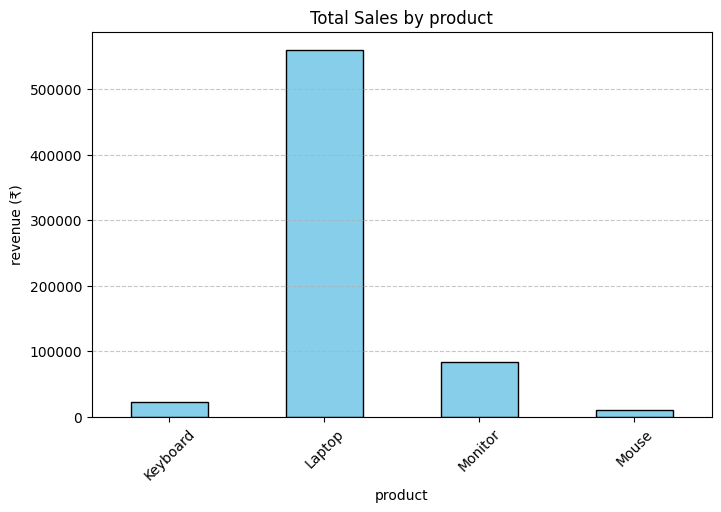

In [89]:
import matplotlib.pyplot as plt

# Grouping by region and summing the total sales
sales_by_region = df.groupby('product')['total'].sum()

# Plotting
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Sales by product')
plt.xlabel('product')
plt.ylabel('revenue (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("sale_chart.png")
plt.show()